<a href="https://colab.research.google.com/github/pepezamarripa/datascience_certificate/blob/main/DS_C3_SC2_JoseZamarripa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a. Instalo bibliotecas

In [55]:
!pip install pyproj

b. Importo bibliotecas

In [56]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import numpy as np
import pyproj
from pyproj import Proj, transform

1. Descargo todos los archivos mexican-states con sus diferntes extensiones

In [57]:
# Creo una carpeta llamada mexican-states, la cual contiene los archivos de mexican-states con el dominio .cpg, .dbf, .prj, .qpj y .shp
shapefile_path = "mexican-states"

# Cargo el shapefile en un GeoDataFrame
mexican_states = gpd.read_file(shapefile_path)

# Selecciono solo las columnas 'name' y 'geometry'
mexican_states = mexican_states.loc[:, ['name', 'geometry']]

# Verificar el GeoDataFrame
print(mexican_states)

                               name  \
0                    Aguascalientes   
1                            Colima   
2                          Tlaxcala   
3                  Ciudad de México   
4                           Morelos   
5                            México   
6                           Hidalgo   
7                            Puebla   
8                        Nuevo León   
9              Coahuila de Zaragoza   
10                        Chihuahua   
11                           Sonora   
12              Michoacán de Ocampo   
13                        Querétaro   
14                       Guanajuato   
15                          Jalisco   
16                        Zacatecas   
17                          Durango   
18                       Tamaulipas   
19  Veracruz de Ignacio de la Llave   
20                         Guerrero   
21                          Sinaloa   
22                           Oaxaca   
23                          Nayarit   
24                       

In [58]:
# Verifico si hay valores nulos en cualquier columna del GeoDataFrame
hay_nulos = mexican_states.isnull().any()

# Imprimir las columnas con valores nulos (si las hay)
print(hay_nulos)

name        False
geometry    False
dtype: bool


2. Descargo datos de la localización de las sucursales de Costco en un DataFrame.

In [59]:
# Obtengo el fichero
csv_file_path = "tiendasCostco.csv"

# Cargo el fichero tiendasCostco.csv en un DataFrame
tiendasCostco = pd.read_csv(csv_file_path)

# Eliminar la columna 'direccion' y 'tel centro llantero'
tiendasCostco = tiendasCostco.drop([' direccion', ' tel centro llantero'], axis=1)

#  Renombro las columnas para eliminar el espacio en blanco antes del nombre de la columna
tiendasCostco = tiendasCostco.rename(columns={' id': 'id', ' nombre': 'nombre', ' ubicacion': 'ubicacion', ' latitud': 'latitud', ' longitud': 'longitud'})

# Verificar el DataFrame
print(tiendasCostco.head())

   id          nombre          ubicacion    latitud   longitud
0   1        "Puebla"             Puebla  19.033499 -98.237794
1   2   "Villa Coapa"              Coapa  19.284359 -99.138655
2   3    "Cuernavaca"         Cuernavaca  18.934481 -99.233430
3   4    "Lindavista"  Gustavo A. Madero  19.481697 -99.130063
4   5       "Mixcoac"     Alvaro Obregón  19.387237 -99.190718


In [60]:
# Verificar si hay valores nulos en cualquier columna del DataFrame
hay_nulos = tiendasCostco.isnull().any()

# Imprimir las columnas con valores nulos (si las hay)
print(hay_nulos)


id           False
nombre       False
ubicacion    False
latitud      False
longitud     False
dtype: bool


3. Convierto el Dataframe tiendasCostco en un GeoDataFrame

In [61]:
# Creo la columna 'geometry' usando como base las columnas 'latitud' y 'longitud'
tiendasCostco['geometry'] = tiendasCostco.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

# Convierto el DataFrame en un GeoDataFrame
gdf_tiendasCostco = gpd.GeoDataFrame(tiendasCostco, geometry='geometry', crs='EPSG:3395')


3.1 Grafico el nuevo GeoDataFrame

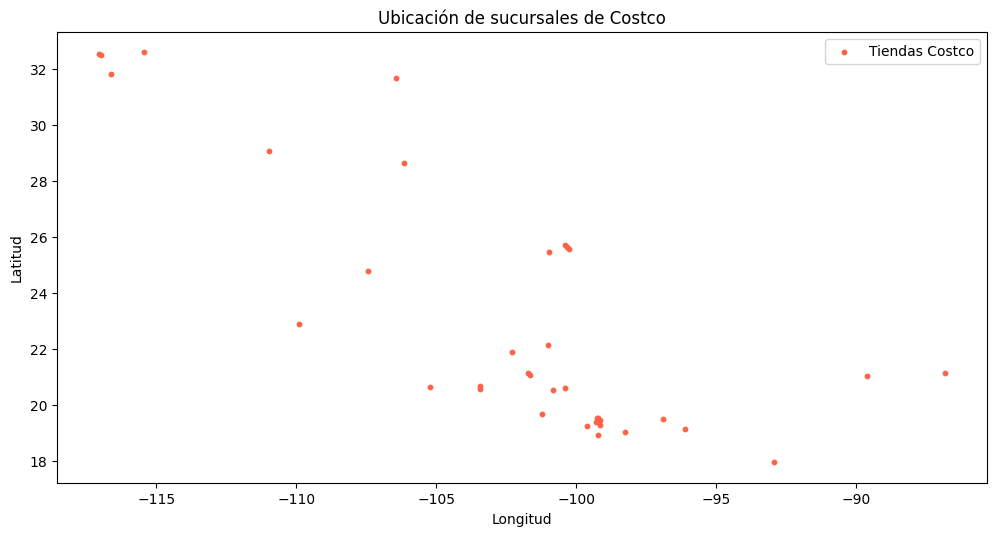

In [62]:
# Crea una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Grafico los puntos en la columna 'geometry', los cuales representan la ubicación de las sucursales de Costco
gdf_tiendasCostco.plot(ax=ax, marker='o', color='tomato', markersize=10, label='Tiendas Costco')

# Agrego el título del gráfico y los nombres de los ejes
ax.set_title('Ubicación de sucursales de Costco')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra una leyenda
ax.legend()

# Muestra el gráfico
plt.show()


4. Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados

               name                                           geometry  \
0    Aguascalientes  POLYGON ((-102.74530 21.72005, -102.74859 21.7...   
1            Colima  MULTIPOLYGON (((-103.48859 18.96489, -103.4884...   
2          Tlaxcala  POLYGON ((-98.54150 19.46082, -98.54158 19.460...   
3  Ciudad de México  POLYGON ((-99.27870 19.13170, -99.28259 19.138...   
4           Morelos  POLYGON ((-98.90339 19.03848, -98.90061 19.038...   

         region  
0  Centro Oeste  
1  Centro Oeste  
2        Centro  
3        Centro  
4        Centro  
                                                       geometry  \
region                                                            
Centro        POLYGON ((-99.06596 18.33265, -99.06612 18.333...   
Centro Oeste  MULTIPOLYGON (((-106.24013 21.33311, -106.2398...   
Noreste       POLYGON ((-104.24942 22.74840, -104.24981 22.7...   
Noroeste      MULTIPOLYGON (((-114.29280 27.11006, -114.2928...   
Sureste       MULTIPOLYGON (((-96.05972 15.77

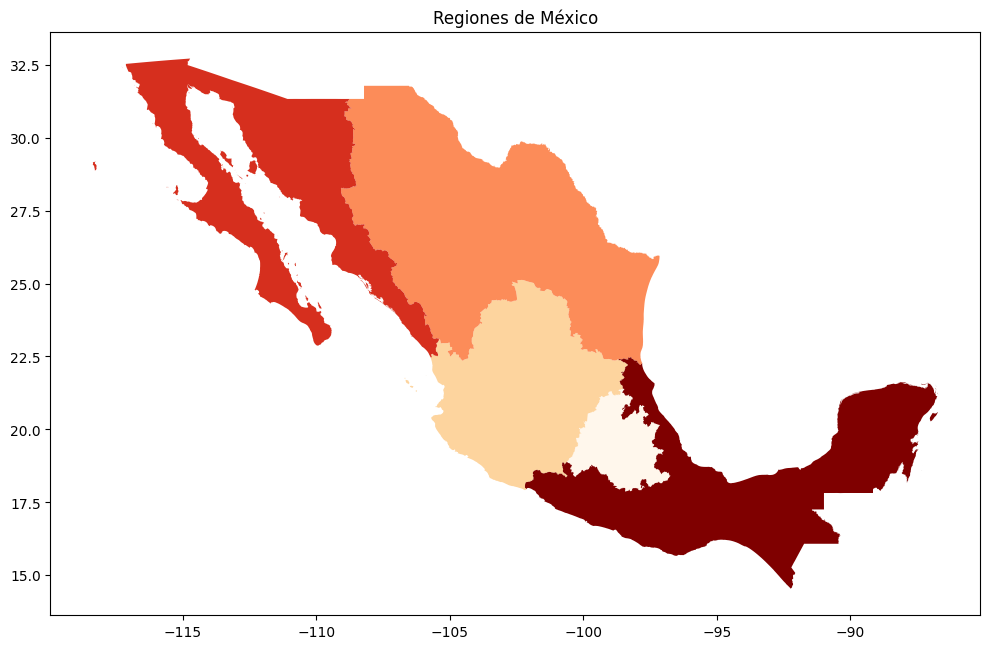

In [63]:
# Creo un diccionario que mapee los Estados del país con las regiones
regiones_dict = {
    'Tlaxcala': 'Centro',
    'Puebla': 'Centro',
    'Ciudad de México': 'Centro',
    'Morelos': 'Centro',
    'México': 'Centro',
    'Hidalgo': 'Centro',
    'Jalisco': 'Centro Oeste',
    'Michoacán de Ocampo': 'Centro Oeste',
    'Colima': 'Centro Oeste',
    'Aguascalientes': 'Centro Oeste',
    'Nayarit': 'Centro Oeste',
    'Zacatecas': 'Centro Oeste',
    'San Luis Potosí': 'Centro Oeste',
    'Guanajuato': 'Centro Oeste',
    'Querétaro': 'Centro Oeste',
    'Chihuahua': 'Noreste',
    'Coahuila de Zaragoza': 'Noreste',
    'Nuevo León': 'Noreste',
    'Tamaulipas': 'Noreste',
    'Durango': 'Noreste',
    'Baja California': 'Noroeste',
    'Baja California Sur': 'Noroeste',
    'Sonora': 'Noroeste',
    'Sinaloa': 'Noroeste',
    'Guerrero': 'Sureste',
    'Veracruz de Ignacio de la Llave': 'Sureste',
    'Oaxaca': 'Sureste',
    'Tabasco': 'Sureste',
    'Chiapas': 'Sureste',
    'Campeche': 'Sureste',
    'Yucatán': 'Sureste',
    'Quintana Roo': 'Sureste'
}

# Agrego la columna 'region' al GeoDataFrame mexican_states
mexican_states['region'] = mexican_states['name'].map(regiones_dict)

# Verifico que la columna fue creada correctamente
print(mexican_states.head())


# Agrupo los estados por 'region' y uno los polígonos/multipolígonos que formarán las regiones
mexican_regions_grouped = mexican_states.dissolve(by='region')

# Creo el GeoDataFrame mexican_regions a partir de las regiones agrupadas
mexican_regions = gpd.GeoDataFrame(mexican_regions_grouped, geometry='geometry')

# Verifico que el nuevo GeoDataFrame 'mexican_regions' tenga la estructura deseada
print(mexican_regions)

# Dibujo el mapa de las regiones
mexican_regions.plot(figsize=(12, 8), cmap='OrRd', legend=True)

# Agrega un título al mapa
plt.title('Regiones de México')

# Muestra el mapa
plt.show()

5. Ahora sobrepongo ambos GeoDataFrames para comprobar que ambos tienen las misma escala

<ipython-input-64-65f9a961ef2d>:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


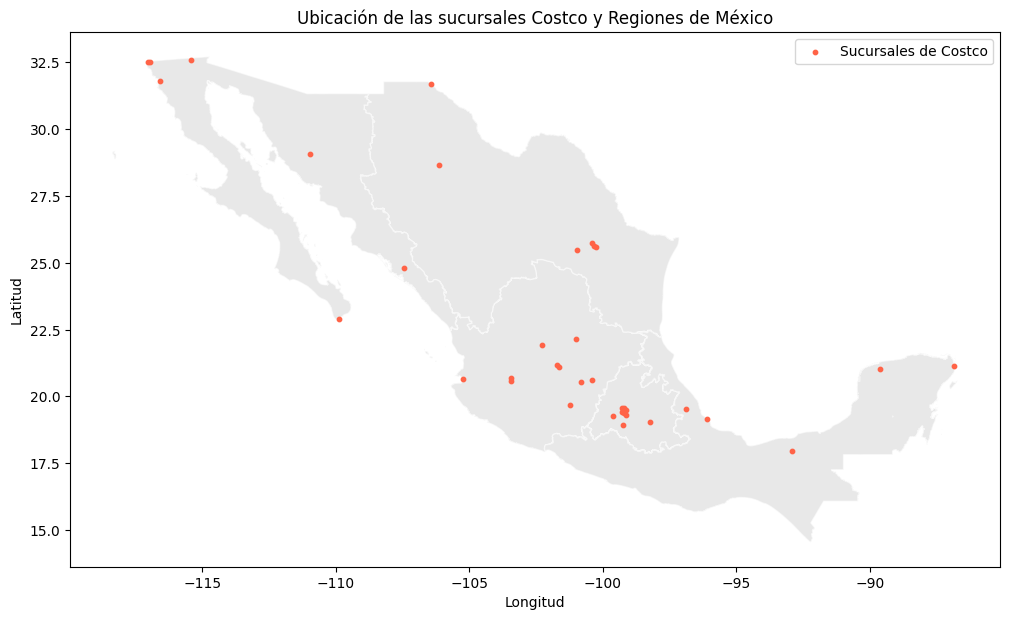

In [64]:
# Creo una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Grafico las regiones de México
mexican_regions.plot(ax=ax, color='lightgray', edgecolor='white', alpha=0.5, label='Regiones de México')

# Grafico la ubicación de las tiendas de Costco
gdf_tiendasCostco.plot(ax=ax, marker='o', color='tomato', markersize=10, label='Sucursales de Costco')

# Agrego el título y nombre de los ejes
ax.set_title('Ubicación de las sucursales Costco y Regiones de México')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

6. Creo la cobertura de 120 km de cada una de las sucursales de Costco

In [65]:
# Defino el radio de cobertura en metros
radio_cobertura_metros = 120000

# Creo una nueva columna 'cobertura_tienda' que contiene los polígonos de cobertura con el radio de 120 km
gdf_tiendasCostco['cobertura_tienda'] = gdf_tiendasCostco['geometry'].buffer(radio_cobertura_metros)

# Verifica el GeoDataFrame con la nueva columna de cobertura
print(gdf_tiendasCostco.head())


   id          nombre          ubicacion    latitud   longitud  \
0   1        "Puebla"             Puebla  19.033499 -98.237794   
1   2   "Villa Coapa"              Coapa  19.284359 -99.138655   
2   3    "Cuernavaca"         Cuernavaca  18.934481 -99.233430   
3   4    "Lindavista"  Gustavo A. Madero  19.481697 -99.130063   
4   5       "Mixcoac"     Alvaro Obregón  19.387237 -99.190718   

                 geometry                                   cobertura_tienda  
0  POINT (-98.238 19.033)  POLYGON ((119901.762 19.033, 119323.929 -11743...  
1  POINT (-99.139 19.284)  POLYGON ((119900.861 19.284, 119323.029 -11742...  
2  POINT (-99.233 18.934)  POLYGON ((119900.767 18.934, 119322.934 -11743...  
3  POINT (-99.130 19.482)  POLYGON ((119900.870 19.482, 119323.037 -11742...  
4  POINT (-99.191 19.387)  POLYGON ((119900.809 19.387, 119322.976 -11742...  


7. Ahora, muestro las zonas de cobertura de cada sucursal

In [66]:
# Defino el radio del círculo en grados aproximados, supongo que 1 grado es apro igual 111 km
radio_circulo_grados = 1.0

# Creo una lista para almacenar los círculos de cobertura
circulos = []

# Itero a través de los puntos de la columna 'geometry', los cuales son el centro de los círculos de cobertura
for punto in gdf_tiendasCostco['geometry']:
    centro = punto
    radio_circulo = radio_circulo_grados
    circulo = centro.buffer(radio_circulo)
    circulos.append(circulo)

# Creo un GeoDataFrame a partir de los círculos de cobertura
gdf_circulos = gpd.GeoDataFrame(geometry=circulos, crs=gdf_tiendasCostco.crs)

# Verifico el nuevo GeoDataFrame 'gdf_circulos'
print(gdf_circulos.head())

                                            geometry
0  POLYGON ((-97.238 19.033, -97.243 18.935, -97....
1  POLYGON ((-98.139 19.284, -98.143 19.186, -98....
2  POLYGON ((-98.233 18.934, -98.238 18.836, -98....
3  POLYGON ((-98.130 19.482, -98.135 19.384, -98....
4  POLYGON ((-98.191 19.387, -98.196 19.289, -98....


8. Sobrepongo los GeoDataFrames para identificar cuáles son las regiones con mayor cobertura.

<ipython-input-67-9b473c81e0e3>:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


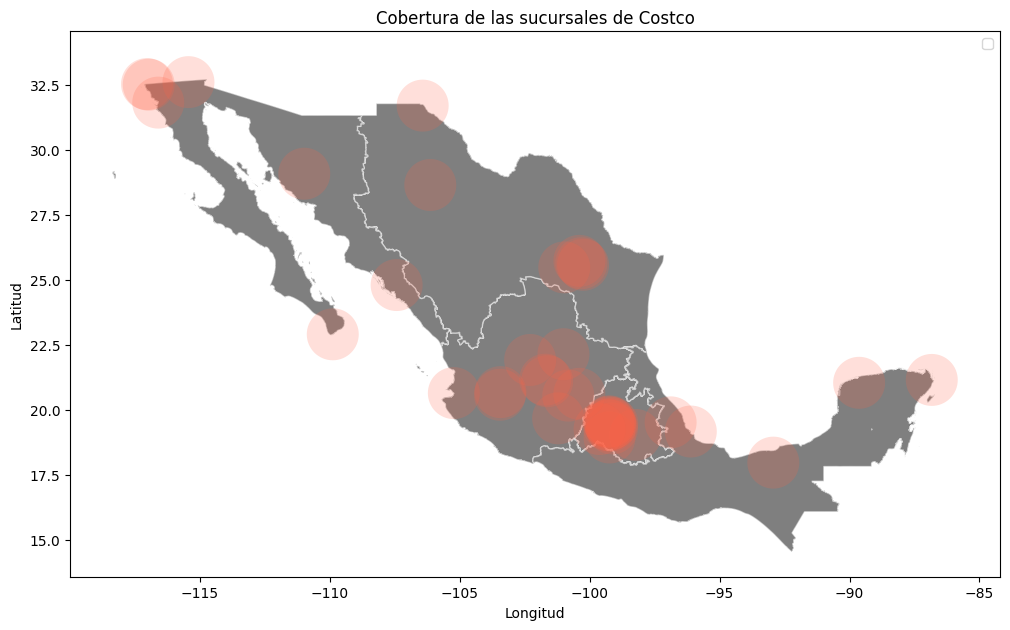

In [67]:
# Creo una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Grafico las regiones de México
mexican_regions.plot(ax=ax, color='black', edgecolor='white', alpha=0.5, label='Regiones de México')

# Grafico los círculos de cobertura
gdf_circulos['geometry'].plot(ax=ax, color='tomato', alpha=0.2, label='Círculos de Cobertura')

# Agrego el título y el nombre de los ejes
ax.set_title('Cobertura de las sucursales de Costco')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Muestra una leyenda
ax.legend()

# Muestra el gráfico
plt.show()


Recomendación:
No abrir sucursales en las siguientes regiones:
1. Noroeste
2. Noreste
3. Sureste